# major problem what we have is that the models try to generalise to all cells and do not focus on local temporal features

in this notebook we are going to simplify our problem by only looking at the individual cells. This allows us to ocmpare different techniques like the moving averages and actual hawkes processes (point processes)

# todo fuse the rnn training loop in meesters and the generic one in masters.


In [39]:
os.listdir("./data/processed")

['MOCK-DATA',
 'T6H-X850M-Y880M',
 'T24H-X85M-Y110M',
 'T24H-X850M-Y880M',
 'T24H-X425M-Y440M',
 'T12H-X850M-Y880M',
 'T1H-X1700M-Y1760M',
 'T3H-X850M-Y880M']

In [49]:
data_dim_str = 'T1H-X1700M-Y1760M'#'T3H-X850M-Y880M'
data_path = f"./data/processed/{data_dim_str}/"


conf_dict = {
    "seed": 3,
    "resume": False,
    "early_stopping": False,
    "use_cuda": False,
    "val_ratio": 0.1,
    "tst_ratio": 0.2,
    "sub_sample_train_set": True,
    "sub_sample_validation_set": True,
    "sub_sample_test_set": False,
    "flatten_grid": True,
    "lr": 1e-3,
    "weight_decay": 1e-8,
    "max_epochs": 10,
    "batch_size": 64,
    "dropout": 0,
    "shuffle": False,
    "num_workers": 6,
    "seq_len": 0,
    "top_k_cells": 20,
    "use_top_k_cells": False,
}


conf = BaseConf(conf_dict=conf_dict)

data_group = FlatDataGroup(data_path=data_path, conf=conf)

In [50]:
grids = data_group.shaper.unsqueeze(data_group.crimes)[:,0]

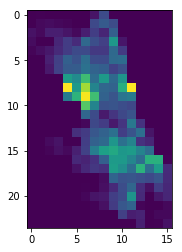

In [51]:
plt.imshow(grids.mean(0))

In [52]:
N,H,W = grids.shape
L = H*W
sequences = np.reshape(grids, (N ,L))

In [53]:
indices = np.argsort(sequences.mean(0))[::-1]

In [2]:
import numpy as np

In [7]:
np.arange(10)[:-1]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

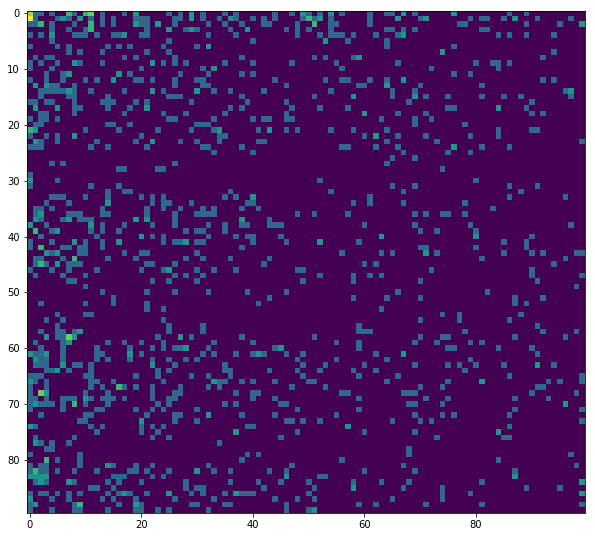

In [58]:
seq_len = 90
top_k = 100
plt.figure(figsize=(10,10))
plt.imshow(sequences[:seq_len,indices[:top_k]])
plt.show()

In [8]:
from sklearn.metrics import precision_score, roc_auc_score

In [36]:
y_true = np.random.binomial(1,.5,(10,))
y_true

# precision_score()

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0])